In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Covid dataset

In [30]:
df = pd.read_csv('MENAR-CountriesCOVID.csv')

In [31]:
df = df.dropna()#### this will drop all rows with a single missing value
df = df.sort_values(by="date")

In [32]:
df.head()

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed
1263,IRQ,2020-03-04,35.0,3.0,4.286,2.0,2.0,0.286
1264,IRQ,2020-03-05,35.0,0.0,4.000,2.0,0.0,0.286
1265,IRQ,2020-03-06,40.0,5.0,4.714,3.0,1.0,0.429
1266,IRQ,2020-03-07,54.0,14.0,5.857,4.0,1.0,0.571
1267,IRQ,2020-03-08,60.0,6.0,5.857,6.0,2.0,0.857


In [33]:
#d = {'ARE' : United_Arab_Emirates, 'BHR' : Bahrain, 'DZA': Algeria,'EGY': Egypt,'IRQ': Iraq, ' ISR': Israel, 'JOR': Jordan,'KWT':Kuwait,'LBN':Lebanon,'LBY':Libya, ' MAR':Marocco ,'MRT': Mauritania, 'OMN':Oman,'PSE': Palestine, 'QAT':Qatar,'SAU':Saudi-Arabia,'SOM':Somalia,'SDN':Sudan,'SSD':South_Sudan,'SYR':Syria,'TUN':Tunisia,'YEM':Yemen}

#df['iso_code'] = df['iso_code'].map(d)

In [34]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

iso_code               0
date                   0
total_cases            0
new_cases              0
new_cases_smoothed     0
total_deaths           0
new_deaths             0
new_deaths_smoothed    0
dtype: int64

In [35]:
df.columns

Index(['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed'],
      dtype='object')

# Checking numbers of Countries affected by Covid

In [36]:
df['iso_code'].unique()

array(['IRQ', 'EGY', 'LBN', 'MAR', 'DZA', 'BHR', 'TUN', 'SDN', 'ISR',
       'ARE', 'SAU', 'PSE', 'JOR', 'QAT', 'SYR', 'MRT', 'OMN', 'LBY',
       'KWT', 'SOM', 'YEM', 'SSD'], dtype=object)

In [37]:
list_country = ['DZA', 'BHR', 'EGY', 'IRQ', 'ISR', 'JOR', 'KWT', 'LBN', 'LBY',
       'MRT', 'MAR', 'OMN', 'PSE', 'QAT', 'SAU', 'SOM', 'SSD', 'SDN',
       'SYR', 'TUN', 'ARE', 'YEM']

print(len(list_country))### numbers of countries in Mena region

22


In [38]:
new_deaths_ratio = []
new_cases_ratio = []
 

for i in list_country:
    x = df[df['iso_code']==i]

    new_deaths_rate = sum(x.new_deaths)/len(x)
    new_deaths_ratio.append(new_deaths_rate)
    new_cases_rate = sum(x.new_cases)/len(x)
    new_cases_ratio.append(new_cases_rate)

    


    
    
data = pd.DataFrame({'list_country': list_country,'new_cases_ratio':new_cases_ratio,'new_deaths_ratio':new_deaths_ratio})


new_index = (data['new_cases_ratio'].sort_values(ascending =False)).index.values
sorted_data = data.reindex(new_index)


new_index_1= (data['new_deaths_ratio'].sort_values(ascending =False)).index.values
sorted_data_1 = data.reindex(new_index_1)






Text(0.5, 1.0, 'new_cases_ratio Given Menar Countries')

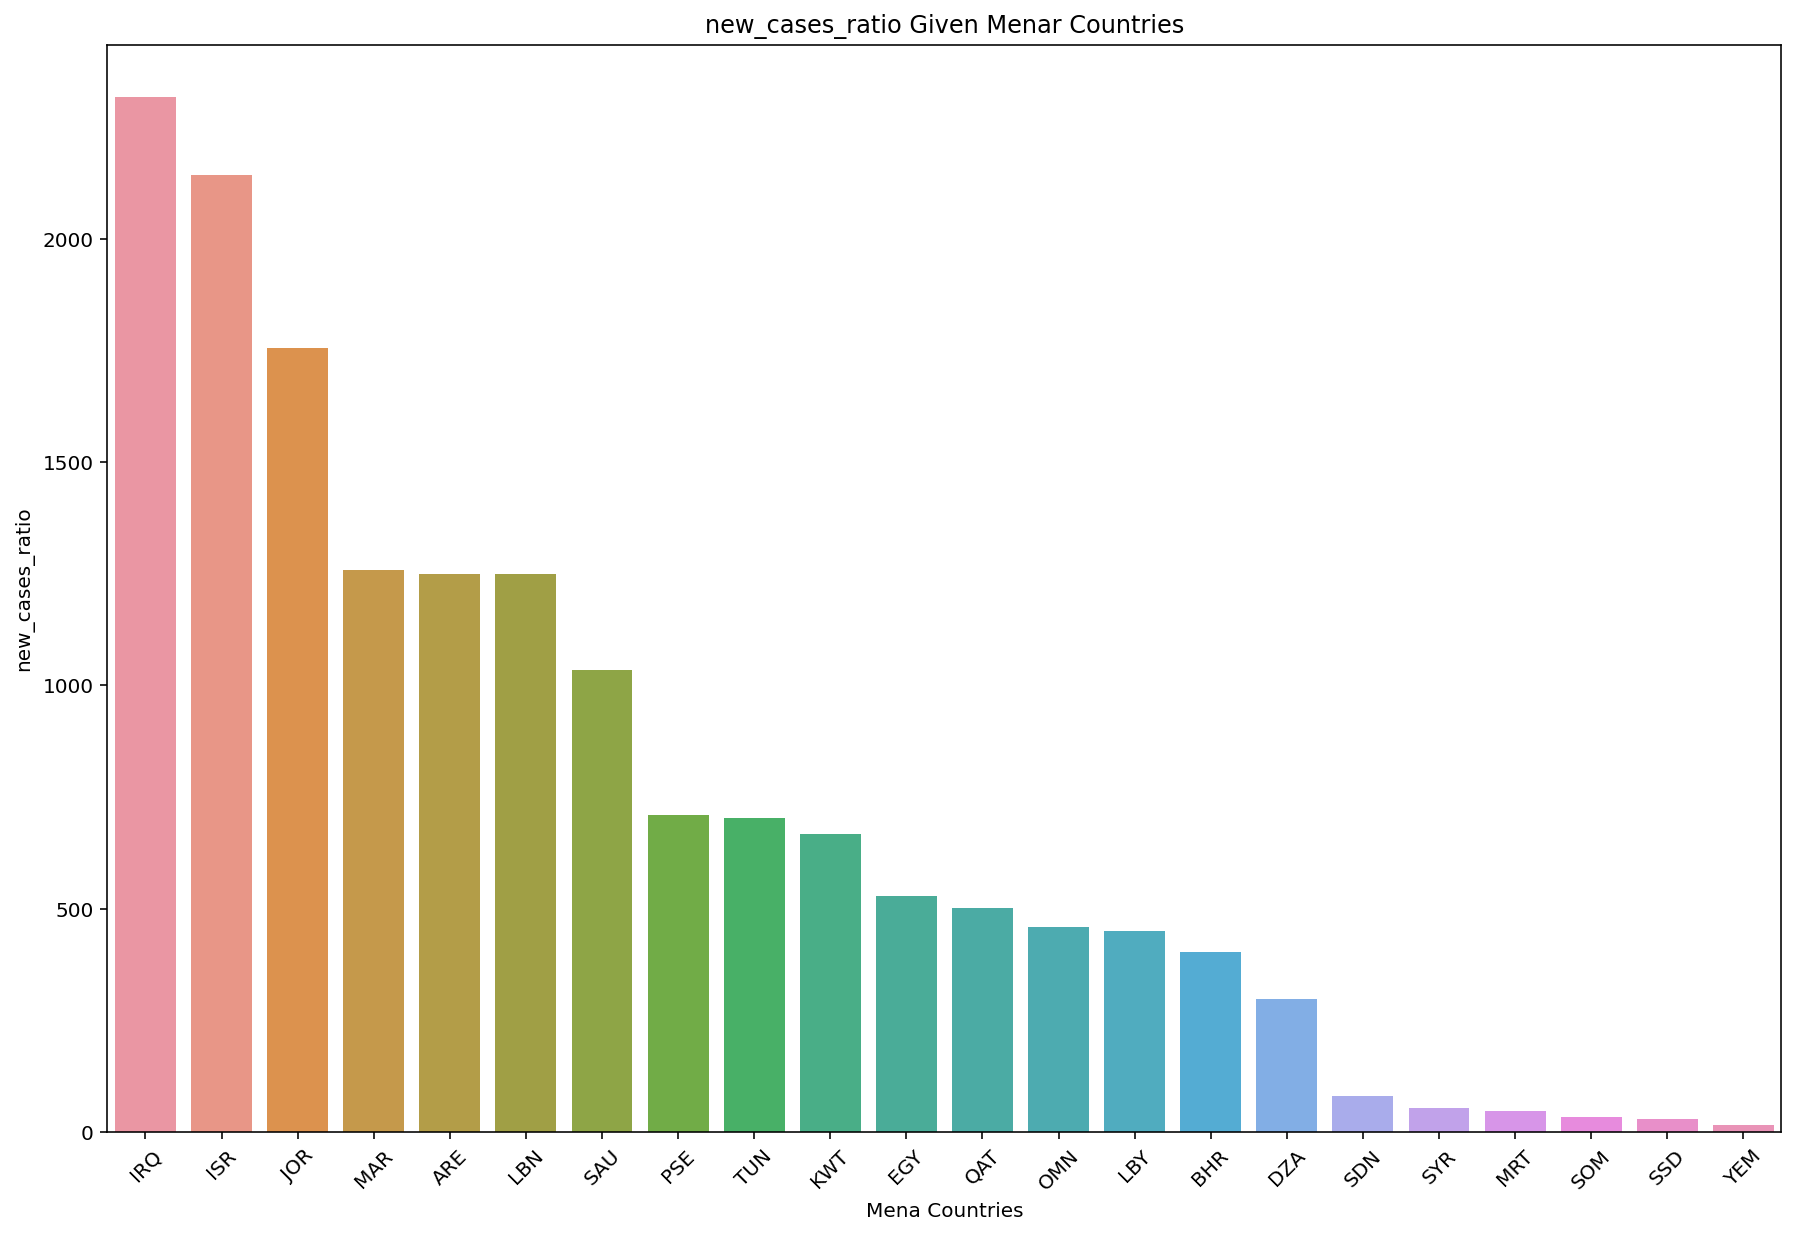

In [39]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['list_country'], y=sorted_data['new_cases_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Mena Countries')
plt.ylabel('new_cases_ratio')
plt.title('new_cases_ratio Given Menar Countries')

Text(0.5, 1.0, 'new_deaths_ratio Given Menar Countries')

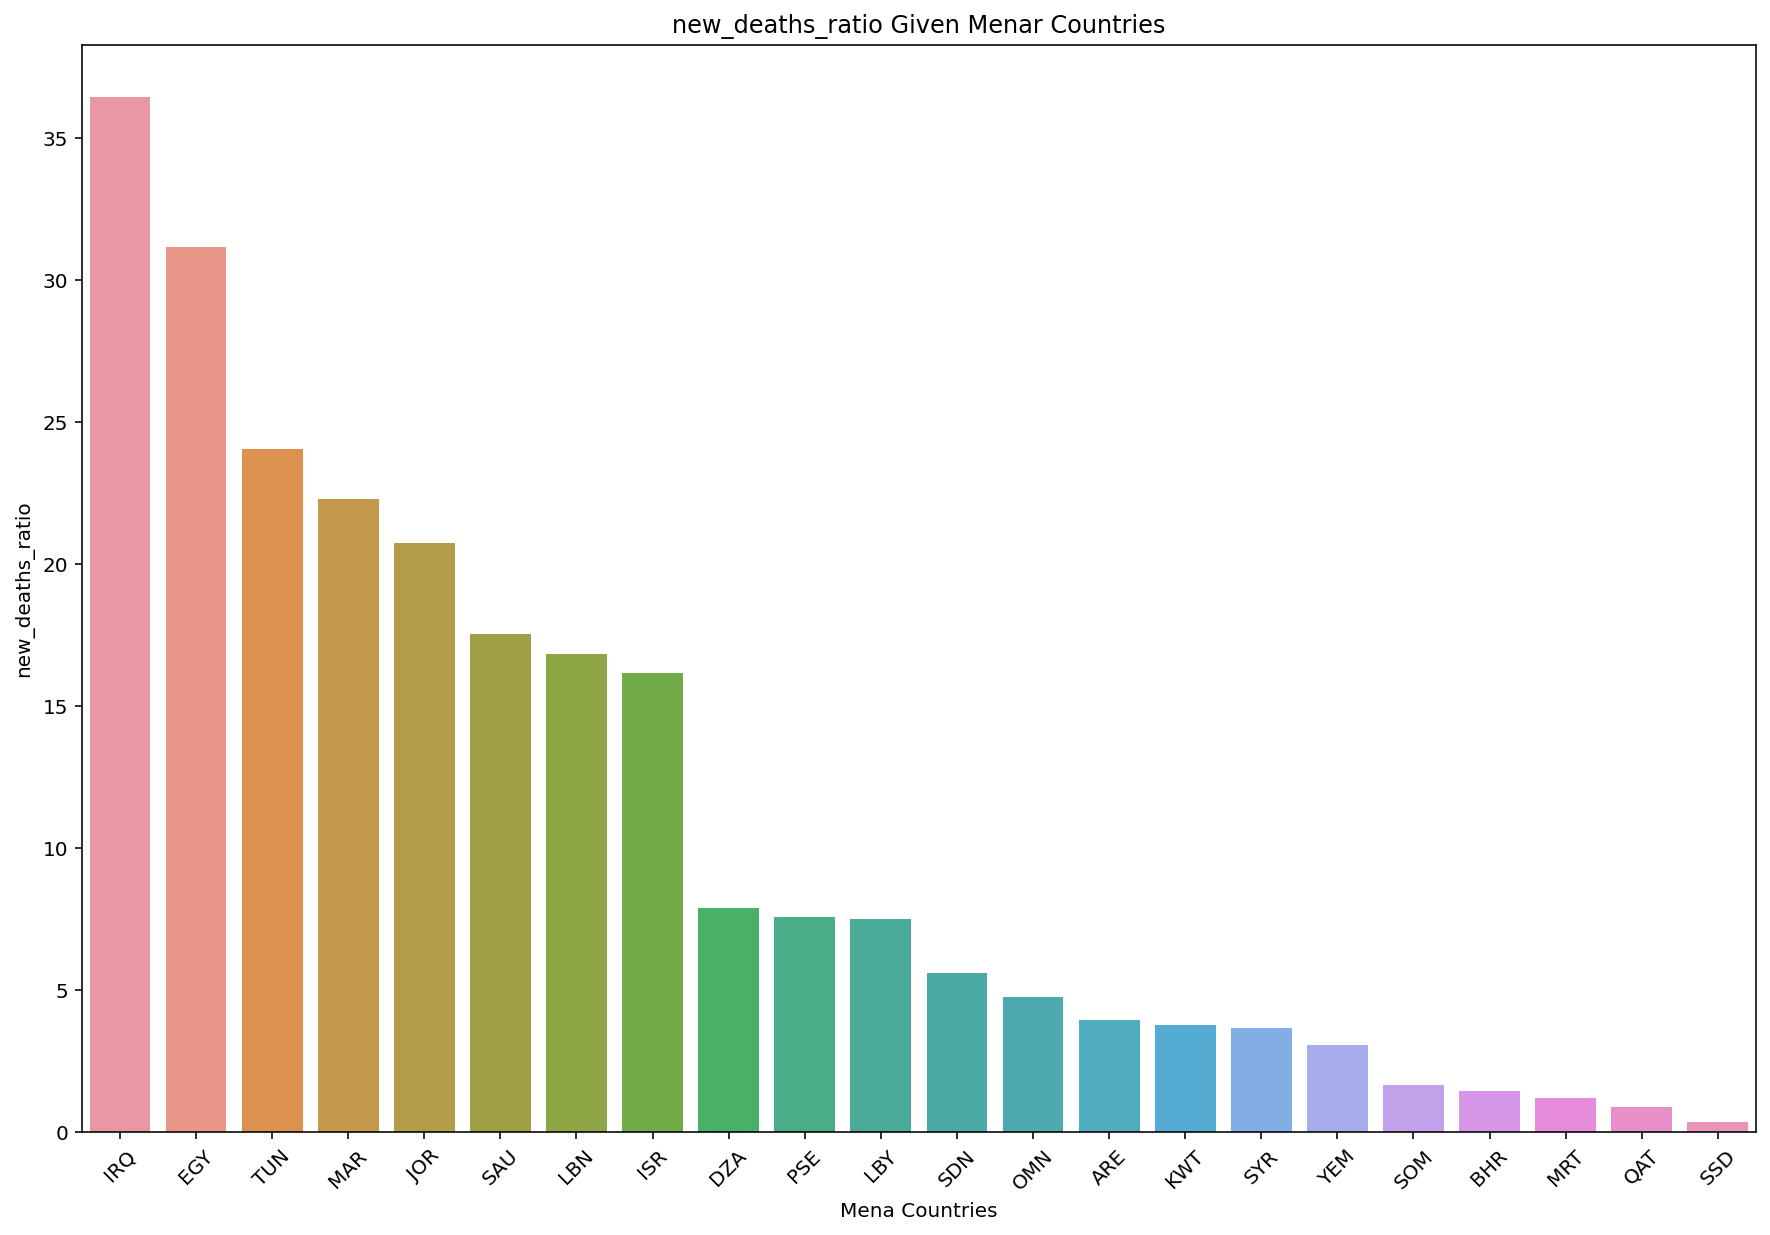

In [40]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data_1['list_country'], y=sorted_data_1['new_deaths_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('Mena Countries')
plt.ylabel('new_deaths_ratio')
plt.title('new_deaths_ratio Given Menar Countries')

# Data analysis of the Spread of Covid over a country

In [50]:
string = input('Write three capital letters for your country : ')

Write three capital letters for your countrySDN


In [51]:
df_1 = df[df['iso_code'] == str(string)]#  covid spread data for a chosen country

In [52]:
df_1

,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed
6975,SDN,2020-03-19,1.0,0.0,0.143,1.0,0.0,0.143
6976,SDN,2020-03-20,1.0,0.0,0.143,1.0,0.0,0.000
6977,SDN,2020-03-21,2.0,1.0,0.143,1.0,0.0,0.000
6978,SDN,2020-03-22,2.0,0.0,0.143,1.0,0.0,0.000
6979,SDN,2020-03-23,2.0,0.0,0.143,1.0,0.0,0.000
...,...,...,...,...,...,...,...,...
7361,SDN,2021-04-09,31833.0,0.0,0.000,2063.0,0.0,0.000
7362,SDN,2021-04-10,31833.0,0.0,0.000,2063.0,0.0,0.000
7363,SDN,2021-04-11,31833.0,0.0,0.000,2063.0,0.0,0.000
7364,SDN,2021-04-12,31833.0,0.0,0.000,2063.0,0.0,0.000


In [53]:
covid_total = df_1.groupby(['date'])['total_cases', 'total_deaths'].sum()
covid_total=covid_total.reset_index().sort_values('date')
covid_total.head()

<ipython-input-53-3019012adb23>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,total_cases,total_deaths
0,2020-03-19,1.0,1.0
1,2020-03-20,1.0,1.0
2,2020-03-21,2.0,1.0
3,2020-03-22,2.0,1.0
4,2020-03-23,2.0,1.0


In [54]:
covid_new = df_1.groupby(['date'])['new_cases_smoothed', 'new_deaths_smoothed'].max()
covid_new=covid_new.reset_index().sort_values('date')
covid_new.head()

<ipython-input-54-b2bfba23136f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,new_cases_smoothed,new_deaths_smoothed
0,2020-03-19,0.143,0.143
1,2020-03-20,0.143,0.000
2,2020-03-21,0.143,0.000
3,2020-03-22,0.143,0.000
4,2020-03-23,0.143,0.000


In [55]:
import plotly.graph_objects as go

x=[i.split('-')[0]+'-'+i.split('-')[1] for i in covid_total.date ]
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total['total_cases'],
                         mode='lines+markers',
                         name='total_cases',
                         line=dict(color='rgb(102, 102, 255)', width=2)))
fig.add_trace(go.Scatter(x=x, 
                         y=covid_total['total_deaths'],
                         mode='lines+markers',
                         name='total_deaths',
                         line=dict(color='rgb(255, 102, 102)', width=2)))

fig.update_layout(
    title = 'Spread of COVID-19 over time in '+str(string)+' per total cases and total deaths',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.show()

In [56]:
#!pip install pandas-bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

Loading BokehJS ...

In [57]:
df_1['date'] = pd.to_datetime(df_1.date, format='%Y-%m-%d')
df_1.reset_index(drop=True, inplace=True)
df_1 = df_1.drop(["new_cases_smoothed"], axis = 1) 
df_1 = df_1.drop(["new_deaths_smoothed"], axis = 1) 
df_1.head()

<ipython-input-57-74b4293afcf9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,date,total_cases,new_cases,total_deaths,new_deaths
0,SDN,2020-03-19,1.0,0.0,1.0,0.0
1,SDN,2020-03-20,1.0,0.0,1.0,0.0
2,SDN,2020-03-21,2.0,1.0,1.0,0.0
3,SDN,2020-03-22,2.0,0.0,1.0,0.0
4,SDN,2020-03-23,2.0,0.0,1.0,0.0


In [58]:
df_1.plot_bokeh(kind="line",title ='Spread of COVID 19'+str(string)+' in real-time ',
                   figsize =(1000,800),
                   xlabel = "number of days",
                   ylabel="Number of positive cases and deaths "
                   )

Figure(id='1396', ...)

In [59]:
df_1.plot_bokeh(kind="bar",title ='Spread of COVID 19'+str(string)+' in real-time',figsize =(1000,800),xlabel = "Nbr of Days",ylabel="Number of positive cases and deaths")

Figure(id='1633', ...)

In [ ]:
#df_population = pd.read_csv('MENAR-Countries.csv')
#df_population.reset_index(drop=True, inplace=True)

In [ ]:
#df_population.head()

In [ ]:
#df_population= df_population[df_population['ISO3'] == str(string)]###Select the population number for a specific country

In [ ]:
#print(df_population)### example   ISO3  Country  Year  Population
#                             20  TUN  Tunisia  2019    11694719

In [ ]:
#rate_total_cases = 0
#list_rate_total_cases = []
#for i, ind in enumerate(df_1.total_cases):
    
    #rate_total_cases = (ind/df_population.Population.values)
    #list_rate_total_cases.append(rate_total_cases)

In [ ]:
#print(rate_total_cases[0])

In [ ]:
#df2 = df_1.assign(rate_total_cases = list_rate_total_cases)
# Observe the result
#df2